In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Dataset (Replace these with actual file paths after downloading)
predictors = pd.read_csv('logisticX.csv')  # Independent Variables
response = pd.read_csv('logisticY.csv')  # Dependent Variable

In [3]:
# Convert to numpy arrays
X = predictors.to_numpy()
y = response.to_numpy().reshape(-1, 1)

In [4]:
# Normalize Features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [5]:
# Add Bias Term
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [6]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
# Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [8]:
# Gradient Descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        theta -= (alpha/m) * (X.T @ (sigmoid(X @ theta) - y))
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

In [9]:
# Train Model (Learning Rate = 0.1)
theta = np.zeros((X.shape[1], 1))
theta, cost_history_01 = gradient_descent(X, y, theta, alpha=0.1, iterations=1000)

In [10]:
print(f'Final Cost Function Value: {cost_history_01[-1]:.4f}')

Final Cost Function Value: 0.2261


In [11]:
print(f'Optimized Theta Values (After Convergence):\n{theta}')

Optimized Theta Values (After Convergence):
[[ 0.38193936]
 [ 2.35449296]
 [-2.53913828]]


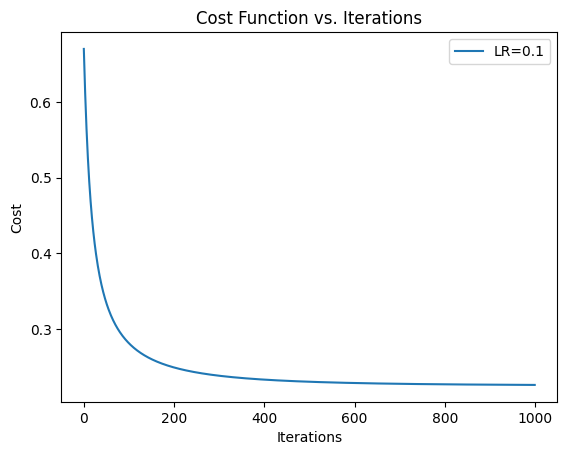

<Figure size 640x480 with 0 Axes>

In [21]:
# Plot Cost Function vs. Iterations
plt.plot(range(len(cost_history_01)), cost_history_01, label='LR=0.1')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost Function vs. Iterations')
plt.show()
plt.savefig('cost_vs_iterations_1.png')

In [12]:
# Train Model (Learning Rate = 5)
theta_5 = np.zeros((X.shape[1], 1))
theta_5, cost_history_5 = gradient_descent(X, y, theta_5, alpha=5, iterations=100)

In [13]:
print(f'Final Cost Function Value: {cost_history_01[-1]:.4f}')

Final Cost Function Value: 0.2261


In [14]:
print(f'Optimized Theta Values (After Convergence):\n{theta}')

Optimized Theta Values (After Convergence):
[[ 0.38193936]
 [ 2.35449296]
 [-2.53913828]]


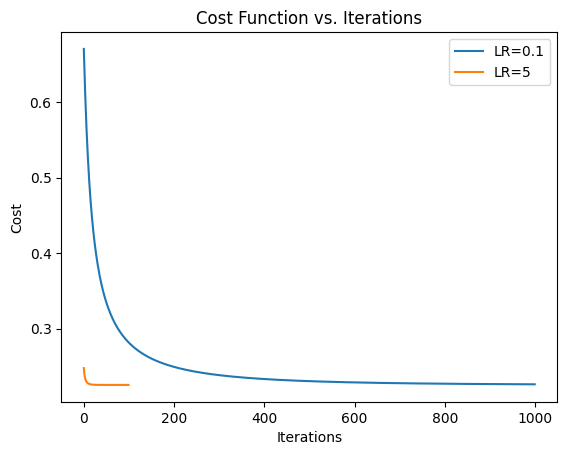

<Figure size 640x480 with 0 Axes>

In [22]:
# Plot Cost Function vs. Iterations
plt.plot(range(len(cost_history_01)), cost_history_01, label='LR=0.1')
plt.plot(range(len(cost_history_5)), cost_history_5, label='LR=5')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost Function vs. Iterations')
plt.show()
plt.savefig('cost_vs_iterations_2.png')

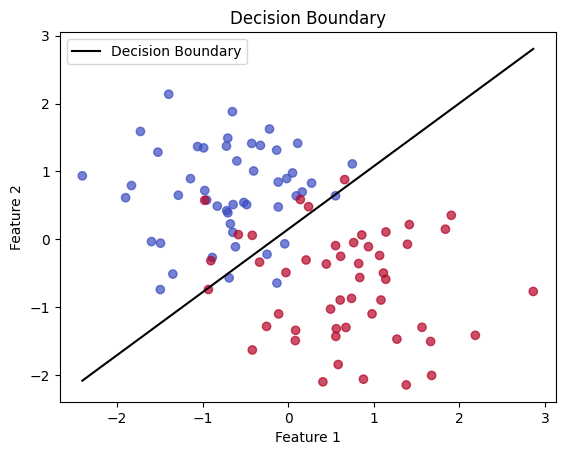

<Figure size 640x480 with 0 Axes>

In [23]:
# Decision Boundary Plot
plt.figure()
plt.scatter(X[:, 1], X[:, 2], c=y.flatten(), cmap='coolwarm', alpha=0.7)
xx = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
yy = -(theta[0] + theta[1] * xx) / theta[2]
plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary')
plt.show()
plt.savefig('Decision Boundary.png')

In [17]:
# Predictions & Confusion Matrix
predictions = (sigmoid(X @ theta) >= 0.5).astype(int)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
conf_matrix = confusion_matrix(y, predictions)
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)

In [18]:
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')

Confusion Matrix:
[[44  5]
 [ 7 43]]
Accuracy: 0.8788, Precision: 0.8958, Recall: 0.8600, F1-score: 0.8776
